# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Uploading the dataset and Inspecting

In [2]:
path = "E:\Downloads\StudentsPerformance2.csv"
df = pd.read_csv(path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Inspecting the first 5 rows of the data

In [3]:
df.describe(include = 'all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


Checking the more info about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Inspecting the data types

In [5]:
df.columns.unique()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

# Cleaning the data

In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

checking missing values and it appears none are missing

In [7]:
df.duplicated().sum()

0

Checking for duplicates and it appears none are duplicated

# Visualise Relationships

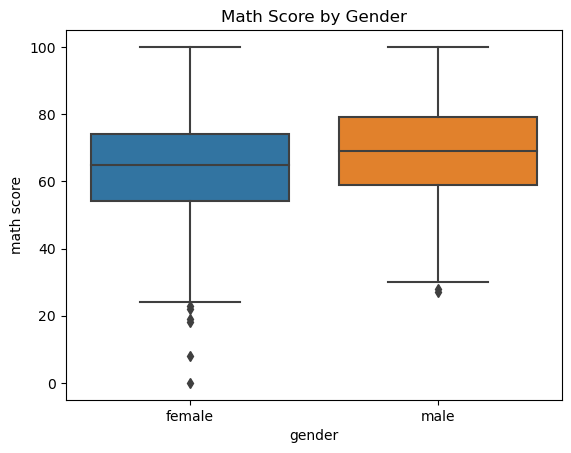

In [8]:
sns.boxplot(x = 'gender', y = 'math score', data = df)
plt.title("Math Score by Gender")
plt.show()

We can see that males are more consistent and higher scores in math than girls. Also girls have a lot of outliers

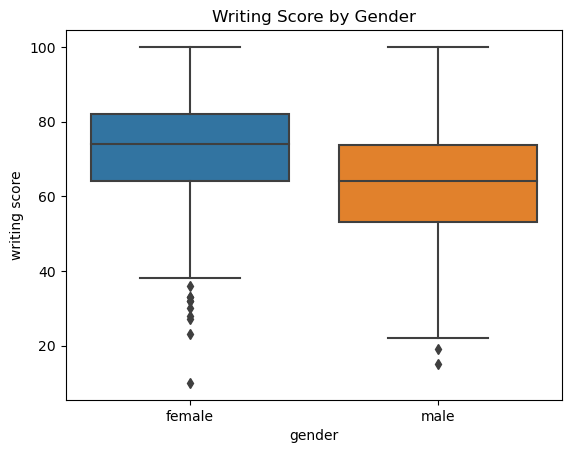

In [9]:
sns.boxplot(x='gender', y='writing score', data = df)
plt.title("Writing Score by Gender")
plt.show()

Females scored higher with a lot of outliers while males are consistent but lower scores

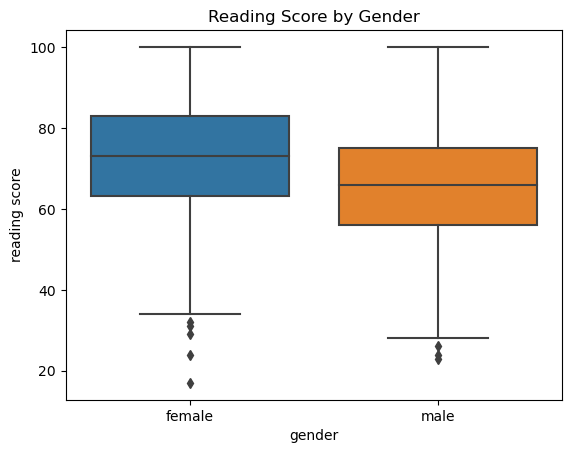

In [10]:
sns.boxplot(x='gender', y='reading score', data=df)
plt.title("Reading Score by Gender")
plt.show()

Females scored higher than males in reading

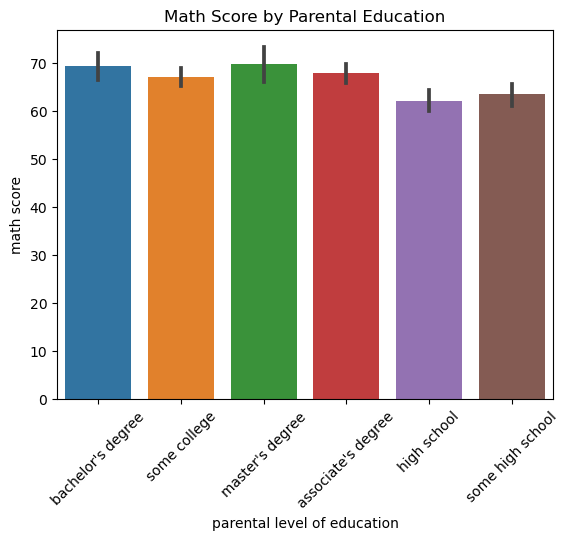

In [11]:
sns.barplot(x = 'parental level of education', y = 'math score', data = df)
plt.xticks(rotation=45)
plt.title("Math Score by Parental Education")
plt.show()

Both master's degree and bachelor's degree parents have children with better scores in math. High school being the lowest

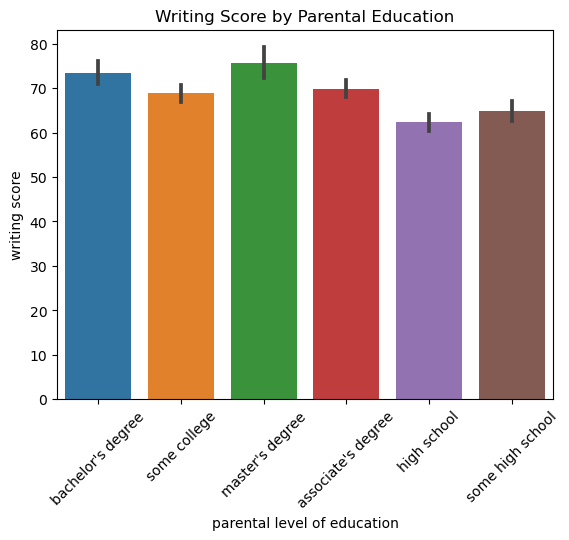

In [12]:
sns.barplot(x = 'parental level of education', y = 'writing score', data = df)
plt.xticks(rotation=45)
plt.title("Writing Score by Parental Education")
plt.show()

We can see the master's here has the highest score

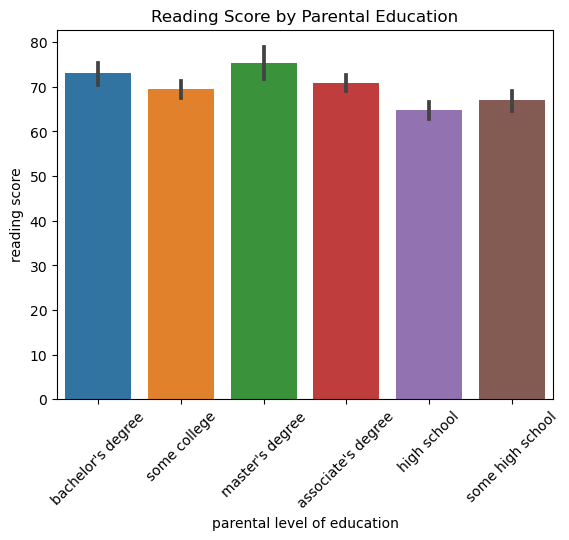

In [13]:
sns.barplot(x = 'parental level of education', y = 'reading score', data = df)
plt.xticks(rotation=45)
plt.title("Reading Score by Parental Education")
plt.show()

Again master's degree scored the highest

In [14]:
numeric_features = ['math score', 'reading score', 'writing score']
df['average score'] = df[numeric_features].mean(axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Creating a new feature to have better insights on the total score

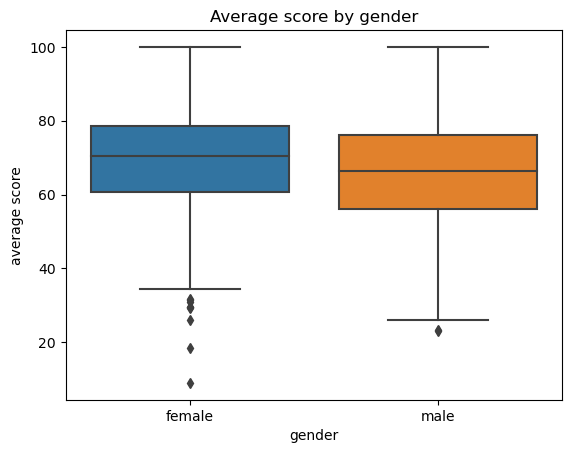

In [15]:
sns.boxplot(x = 'gender', y = 'average score', data = df)
plt.title("Average score by gender")
plt.show()

The average scores of females is higher than that of males but with outliers while the male score is more consistent

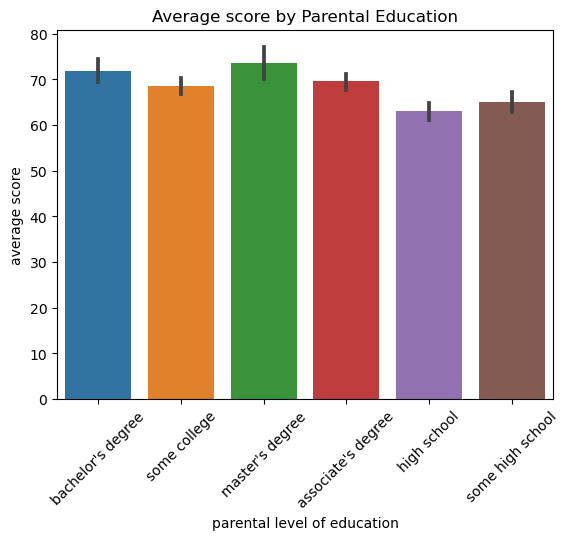

In [16]:
sns.barplot(x = 'parental level of education', y = 'average score', data = df)
plt.xticks(rotation = 45)
plt.title("Average score by Parental Education")
plt.show()

The average score of master's still being the highest followed by bachelor's and high school still being the lowest score

# Training a Regression Model

In [17]:
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

target = 'average score'
X = df[categorical_features + numeric_features]
y = df[target]

Splitting the features

In [18]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean"))
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features),
    ("cat", categorical_pipeline, categorical_features)
])

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", RandomForestRegressor(random_state=1))
])

Creating pipeline for automation

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, predictions)
print("MAE:", mae)

MAE: 0.5342533333333358


Trained the model on the data and used the predictions to calculate mean absolute error. It gave us an error of 0.53 when calculating average scores which is very good considering we didn't normalise the data and the score is from 0 to 100. If we wanted to improve the model, cross-validation will lower the error furthermore

In [20]:
scores = cross_val_score(pipeline, X, y,
                         scoring='neg_mean_absolute_error',
                         cv=5)

# Convert negative scores to positive MAE
mae_scores = -scores

print("MAE scores for each fold:", mae_scores)
print("Average MAE:", mae_scores.mean())

MAE scores for each fold: [0.56623333 0.4482     0.53223333 0.46551667 0.5341    ]
Average MAE: 0.5092566666666667


The mean absolute error decreased by 0.03 after we used cross-validation so it didn't matter that much and because the error is so minimal, normalising the data won't affect that much as well